# Section 4.1 — Simple linear regression

This notebook contains the code examples from [Section 4.1 Simple linear regression]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/lm/simple"

<Figure size 640x480 with 0 Axes>

In [3]:
from ministats.plots.figures import plot_residuals
from ministats.plots.figures import plot_residuals2
from ministats.utils import savefigure

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
import warnings
# silence kurtosistest warning when using n < 20
warnings.filterwarnings("ignore", category=UserWarning)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

$$
\newcommand{\CI}[1]{\textbf{CI}_{#1}}
\newcommand{\CIL}[1]{\textbf{L}_{#1}}
\newcommand{\CIU}[1]{\textbf{U}_{#1}}
\newcommand{\ci}[1]{\textbf{ci}_{#1}}
\newcommand{\cil}[1]{\textbf{l}_{#1}}
\newcommand{\ciu}[1]{\textbf{u}_{#1}}
$$


(this cell contains the macro definitions like $\stderr{\overline{\mathbf{x}}}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions

## Linear model

Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.pdf
Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.png


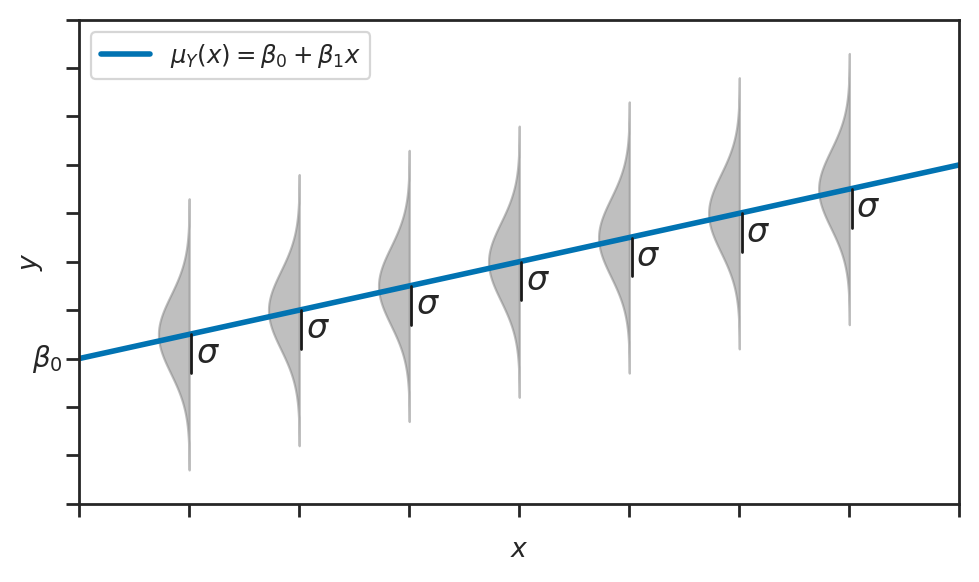

In [6]:
from scipy.stats import norm

# Define the linear model function
def linear_model(x):
    return 30 + 5 * x

# Define sigma for the normal distribution
sigma = 8

onepixel = 0.02

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the linear model
    xs = np.linspace(0, 8, 200)
    ys = linear_model(xs)
    sns.lineplot(x=xs, y=ys, ax=ax, label=r"$\mu_Y(x) = \beta_0 + \beta_1x$", linewidth=2)
    
    # Plot Gaussian distributions at specified x positions and add sigma lines
    x_positions = range(1,8)
    for x_pos in x_positions:
        y_pos = linear_model(x_pos)
        ys = np.linspace(y_pos-3.5*sigma, y_pos+3.5*sigma, 100)
        pdf = 0.7*norm(loc=y_pos, scale=sigma).pdf(ys)
        ax.fill_betweenx(ys, x_pos - pdf * sigma, x_pos, color="grey", alpha=0.5)
        # Draw vertical sigma line and label it on the opposite side of the Gaussian shape
        ax.plot([x_pos+onepixel, x_pos+onepixel], [y_pos, y_pos - sigma], "k", lw=1)
        ax.text(x_pos + 0.06, y_pos - sigma / 2, r"$\sigma$", fontsize=12, va="center")

    # y-intercept
    ax.text(0 - 0.15, 30, r"$\beta_0$", fontsize=10, va="center", ha="right")

    # Set up x-axis
    ax.set_xlim([0, 8])
    ax.set_xlabel("$x$")
    ax.set_xticklabels([])
    
    # Set up y-axis
    ax.set_ylim([0, 100])
    ax.set_ylabel("$y$")
    ax.set_yticks(range(0,110,10))
    ax.set_yticklabels([])
    
    ax.legend(loc="upper left")

filename = os.path.join(DESTDIR, "linear_model_xy_with_gaussians.pdf")
savefigure(fig, filename)

## Example: students score as a function of effort

In [7]:
students = pd.read_csv("../datasets/students.csv")
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.png


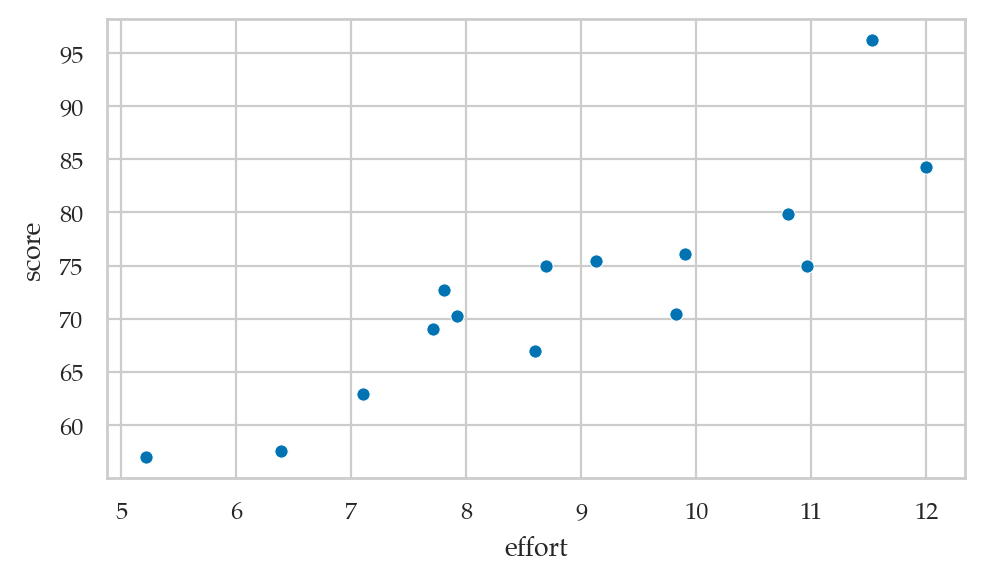

In [8]:
efforts = students["effort"]
scores = students["score"]
sns.scatterplot(x=efforts, y=scores)

filename = os.path.join(DESTDIR, "students_scores_vs_effort_scatterplot.pdf")
savefigure(plt.gcf(), filename)

#### Compute the correlation

In [9]:
np.corrcoef(efforts, scores)[0,1]
# ALT. students[["effort","score"]].corr()
# np.corrcoef

0.8794375135614695

## Parameter estimation using least squares

In [10]:
meaneffort = efforts.mean()
meanscore = scores.mean()
num = np.sum( (efforts-meaneffort)*(scores-meanscore) )
denom = np.sum( (efforts - meaneffort)**2 )
b1 = num / denom
b1

4.504850344209071

In [11]:
b0 = meanscore - b1*meaneffort
b0

32.46580930159963

Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.png


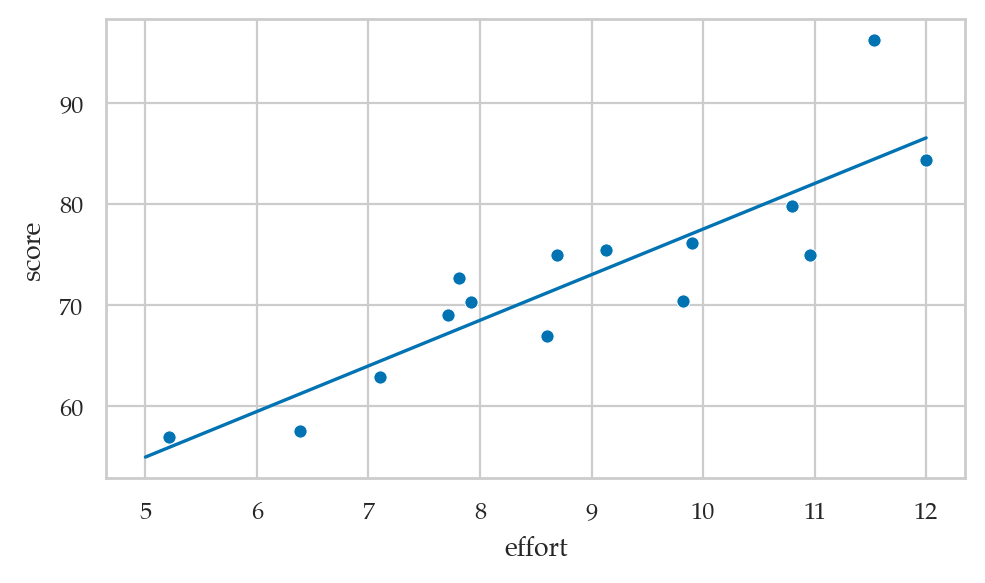

In [12]:
es = np.linspace(5, 12)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats)
sns.scatterplot(x=efforts, y=scores)

filename = os.path.join(DESTDIR, "students_scores_vs_effort_with_line.pdf")
savefigure(plt.gcf(), filename)

In [13]:
# # ALT.
# sns.regplot(x=efforts, y=scores, ci=None);

### Least squares optimization for the parameters

How do we find the parameter estimates of the model?

Saved figure to figures/lm/simple/students_scores_with_residuals.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals.png


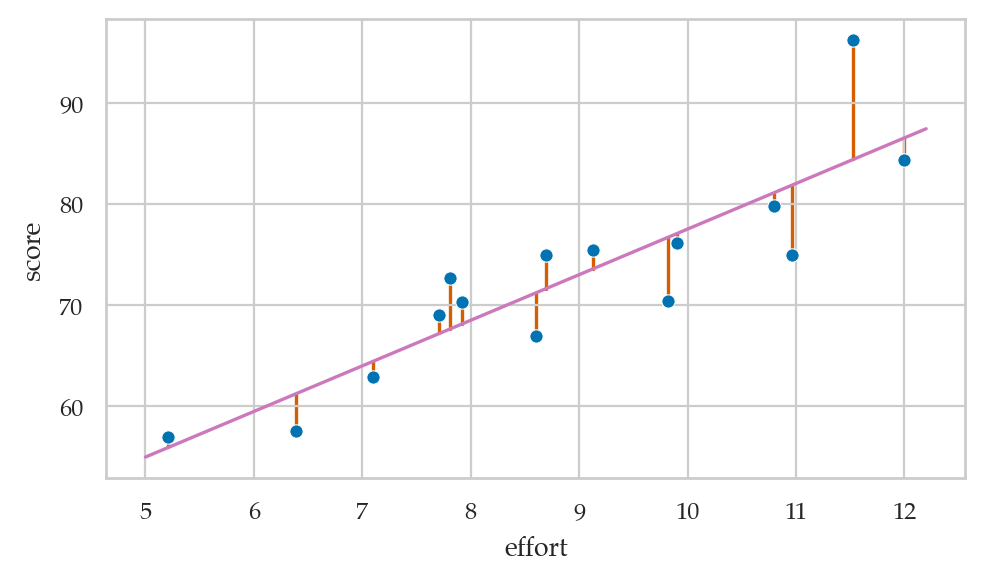

In [14]:
plot_residuals(efforts, scores, b0, b1)
sns.scatterplot(x=efforts, y=scores)
es = np.linspace(5, 12.2)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats, color="C4");

filename = os.path.join(DESTDIR, "students_scores_with_residuals.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/students_scores_with_residuals_squared.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals_squared.png


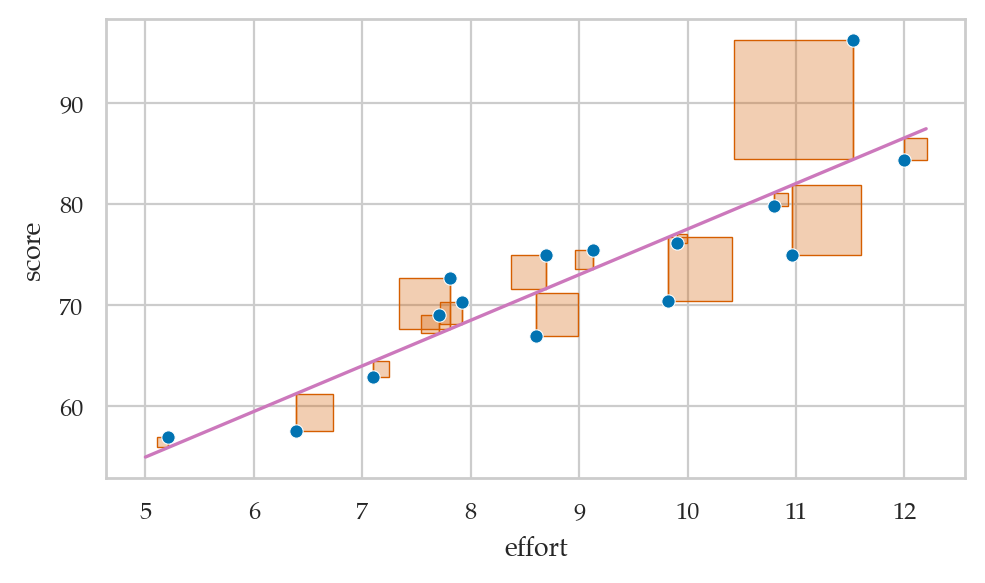

In [15]:
ax = sns.scatterplot(x=efforts, y=scores, zorder=4)
es = np.linspace(5, 12.2)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats, color="C4", zorder=5)
plot_residuals2(efforts, scores, b0, b1, ax=ax);

filename = os.path.join(DESTDIR, "students_scores_with_residuals_squared.pdf")
savefigure(plt.gcf(), filename)

### Estimating the standard deviation parameter

In [16]:
scorehats = b0 + b1*efforts
residuals = scores - scorehats
residuals[0:4]

0   -6.838969
1    3.387041
2   -4.207522
3    2.155776
dtype: float64

In [17]:
SSR = np.sum( residuals**2 )
n = len(students)
sigmahat = np.sqrt( SSR / (n-2) )
sigmahat

4.929598282660258

## Model diagnostics

### Residuals plots

In [18]:
scorehats = b0 + b1*efforts
residuals = scores - scorehats

#### Residuals versus the predicted values

Saved figure to figures/lm/simple/residuals_plot_vs_scorehats.pdf
Saved figure to figures/lm/simple/residuals_plot_vs_scorehats.png


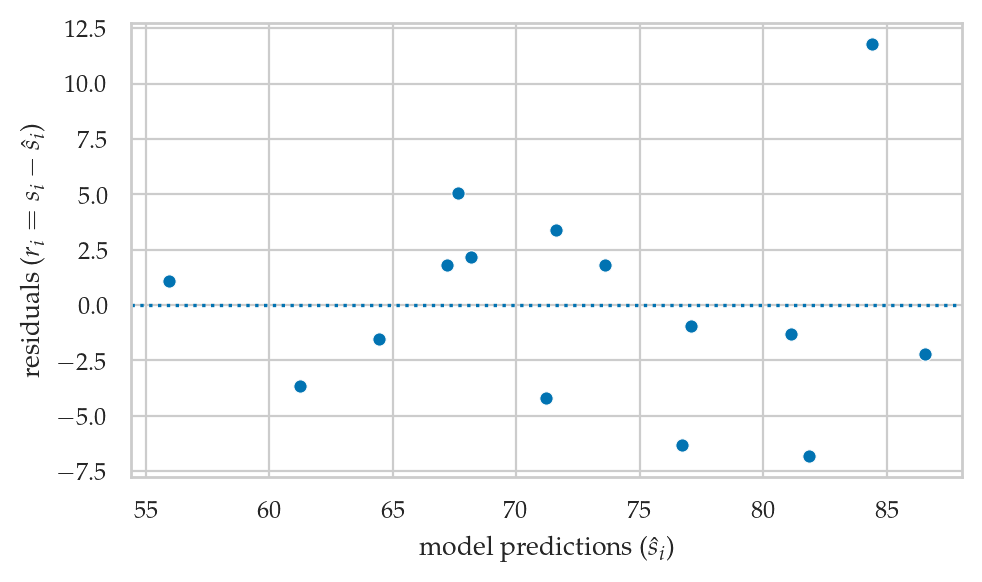

In [19]:
with plt.rc_context({"text.usetex":True}):
    ax = sns.scatterplot(x=scorehats, y=residuals)
    ax.set_xlabel("model predictions ($\\hat{s}_i$)")
    ax.set_ylabel("residuals ($r_i = s_i - \\hat{s}_i$)")
    ax.axhline(y=0, color="b", linestyle="dotted");

filename = os.path.join(DESTDIR, "residuals_plot_vs_scorehats.pdf")
savefigure(plt.gcf(), filename)

#### Residuals versus the predictor (bonus)

In [20]:
# with plt.rc_context({"text.usetex":True}):
#     ax = sns.scatterplot(x=efforts, y=residuals)
#     ax.set_xticks(range(5,12+1))
#     ax.set_ylabel("residuals ($r_i = s_i - \\hat{s}_i$)")
#     ax.axhline(y=0, color="b", linestyle="dotted");
#
# filename = os.path.join(DESTDIR, "residuals_plot_vs_effort.pdf")
# savefigure(plt.gcf(), filename)

#### QQ-plot of the residuals

Saved figure to figures/lm/simple/residuals_plot_vs_effort_qqplot.pdf
Saved figure to figures/lm/simple/residuals_plot_vs_effort_qqplot.png


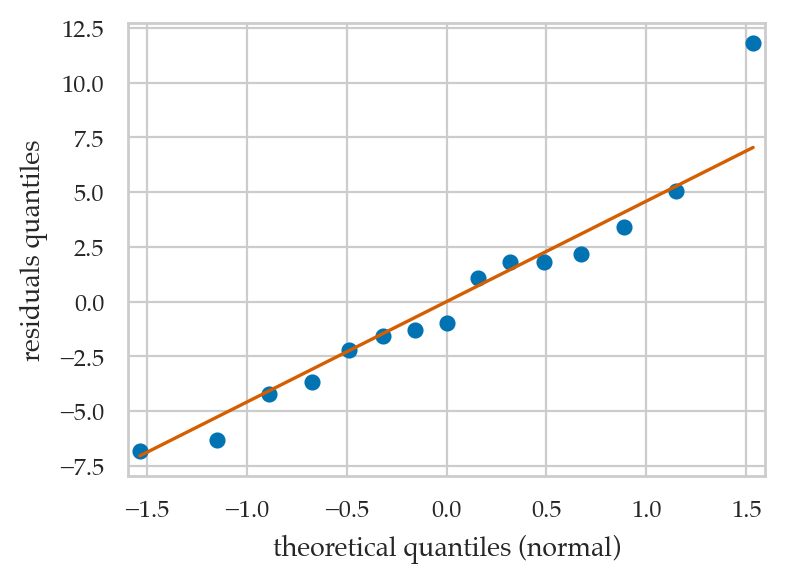

In [21]:
from statsmodels.graphics.api import qqplot
with plt.rc_context({"figure.figsize":(4,3)}):
    qqplot(residuals, line="s")

plt.xlabel("theoretical quantiles (normal)")
plt.ylabel("residuals quantiles")
filename = os.path.join(DESTDIR, "residuals_plot_vs_effort_qqplot.pdf")
savefigure(plt.gcf(), filename)

#### Residuals plots that show violated assumptions

In [209]:
from scipy.stats import uniform, lognorm, randint, norm

np.random.seed(42)
n = 100
xs = np.sort(uniform(0,10).rvs(n))

# (a) quadratic
np.random.seed(43)
y1s = 1.5*xs + 0.1*xs**2 + 0.5*norm(0,1).rvs(n)

# (b) clusters
np.random.seed(44)
y2s = []
K = 10  # number of clusters
batch_size = int(n/K)
for i in range(K):
    r = randint(0, 2).rvs(1)
    y2s_batch = 35*r - 10 + 6*norm(0,1).rvs(batch_size)
    y2s.extend(y2s_batch)

# (c) log-normal error term
np.random.seed(45)
y3s = 2.5*xs -3 + lognorm(1).rvs(n)

# (d) heteroscedasticity
np.random.seed(47)
sigmas = np.linspace(1, 20, n)
y4s = 1.7*xs + 0.9*norm(loc=0, scale=sigmas).rvs(n)

ysdf = pd.DataFrame({"x":xs, "y1":y1s, "y2":y2s, "y3":y3s, "y4":y4s})

Saved figure to figures/lm/simple/residuals_plots_with_violated_assumptions.pdf
Saved figure to figures/lm/simple/residuals_plots_with_violated_assumptions.png


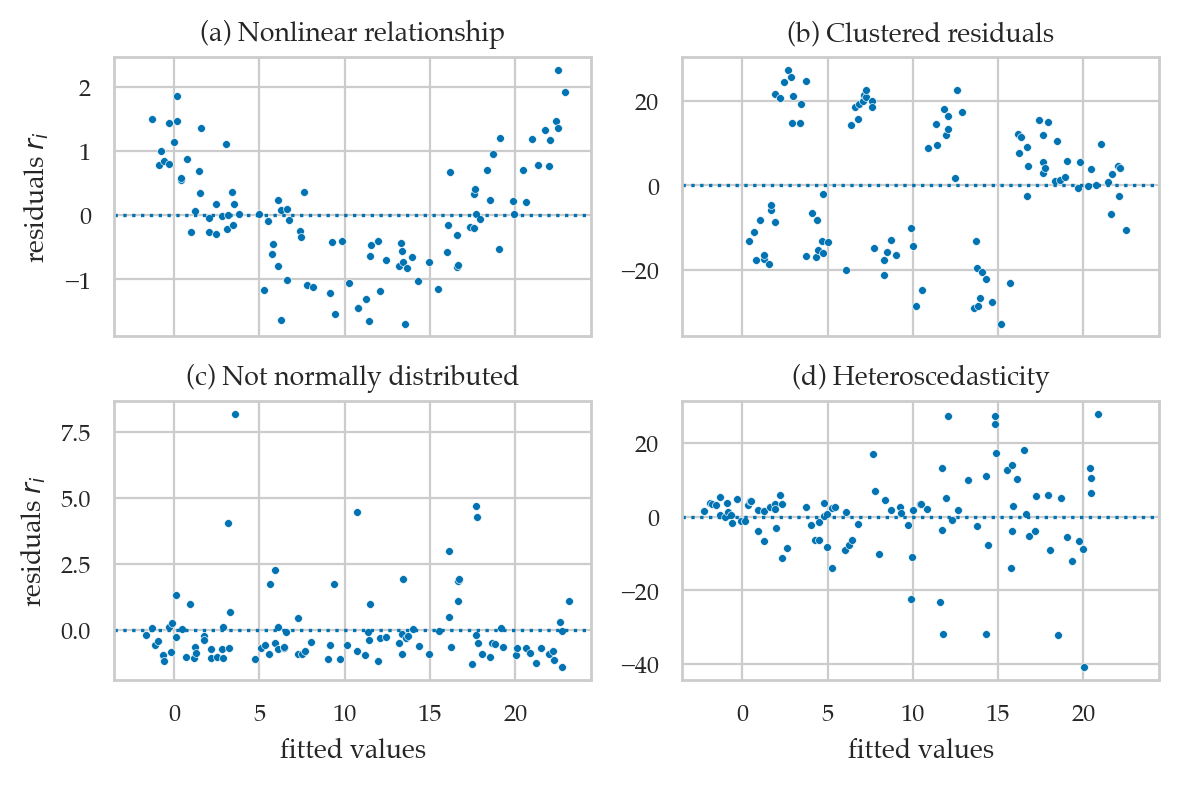

In [212]:
from ministats import plot_resid

with plt.rc_context({"figure.figsize":(6,4)}):
    fig, axs_matrix = plt.subplots(2,2, sharex=True)
    axs = [ax for row in axs_matrix for ax in row]

    lmy1s = smf.ols("y1 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy1s, None, ax=axs[0])
    axs[0].set_xlabel(None)
    axs[0].set_title("(a) Nonlinear relationship")
    
    lmy2s = smf.ols("y2 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy2s, None, ax=axs[1])
    axs[1].set_xlabel(None)
    axs[1].set_ylabel(None)
    axs[1].set_title("(b) Clustered residuals")

    lmy3s = smf.ols("y3 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy3s, None, ax=axs[2])
    axs[2].set_title("(c) Not normally distributed")

    lmy4s = smf.ols("y4 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy4s, None, ax=axs[3])
    axs[3].set_ylabel(None)
    axs[3].set_title("(d) Heteroscedasticity")

    filename = os.path.join(DESTDIR, "residuals_plots_with_violated_assumptions.pdf")
    savefigure(fig, filename)

### Sum of squares quantities

#### Sum of squared residuals

In [23]:
SSR = np.sum( residuals**2 )
SSR

315.9122099692906

#### Explained sum of squares

In [24]:
meanscore = scores.mean()
ESS = np.sum( (scorehats-meanscore)**2 ) 
ESS

1078.2917900307098

#### Total sum of squares

In [25]:
TSS = np.sum( (scores - meanscore)**2 )
TSS

1394.2040000000002

In [26]:
SSR + ESS  # == TSS

1394.2040000000004

### Coefficient of determination $R^2$

In [27]:
R2 = ESS / TSS
R2

0.7734103402591799

#### Related to the Pearson correlation coefficient

In [28]:
efforts = students["effort"]
scores = students["score"]
pearson_r = efforts.corr(scores)
pearson_r**2

0.7734103402591799

In [29]:
# ALT.
from scipy.stats import pearsonr
r = pearsonr(efforts, scores)[0]
r**2

0.7734103402591799

## Using linear models to make predictions

In [30]:
def predict(x, b0, b1):
    yhat = b0 + b1*x
    return yhat

### Confidence interval for the mean

TODO: add formulas

### Confidence interval for observations

TODO: add formulas

### Example:predicting students' scores

Predict the `score` of a new student who invests 9 hours of `effort` per week.

In [31]:
neweffort = 9
scorehat = predict(neweffort, b0=32.5, b1=4.5)
scorehat

73.0

#### Confidence interval for the mean score

In [32]:
#######################################################
newdev = (neweffort - efforts.mean())**2
sum_dev2 = np.sum((efforts - efforts.mean())**2)
se_meanscore = sigmahat*np.sqrt(1/n + newdev/sum_dev2)
se_meanscore

1.2744485881877106

In [33]:
from scipy.stats import t as tdist
alpha = 0.1
t_l, t_u = tdist(df=n-2).ppf([alpha/2, 1-alpha/2])
[scorehat + t_l*se_meanscore, scorehat + t_u*se_meanscore]

[70.74303643371016, 75.25696356628984]

Saved figure to figures/lm/simple/prediction_mean_score_vs_effort.pdf
Saved figure to figures/lm/simple/prediction_mean_score_vs_effort.png


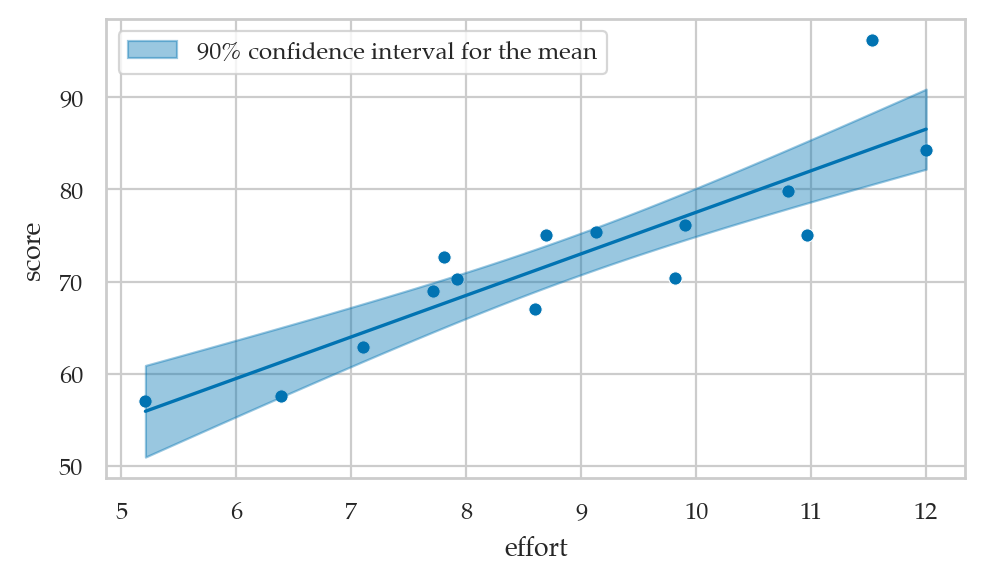

In [34]:
# FIGURES ONLY
from ministats import plot_reg
from ministats import plot_pred_bands
import statsmodels.formula.api as smf

lm1 = smf.ols("score ~ 1 + effort", data=students).fit()
plot_reg(lm1)
plot_pred_bands(lm1, ci_mean=True)

filename = os.path.join(DESTDIR, "prediction_mean_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

#### Confidence interval for predicted scores

In [35]:
se_score = sigmahat*np.sqrt(1 + 1/n + newdev/sum_dev2)
se_score

5.0916754052414435

In [36]:
alpha = 0.1
t_l, t_u = tdist(df=n-2).ppf([alpha/2, 1-alpha/2])
[scorehat + t_l*se_score, scorehat + t_u*se_score]

[63.98298198333331, 82.0170180166667]

Saved figure to figures/lm/simple/prediction_values_score_vs_effort.pdf
Saved figure to figures/lm/simple/prediction_values_score_vs_effort.png


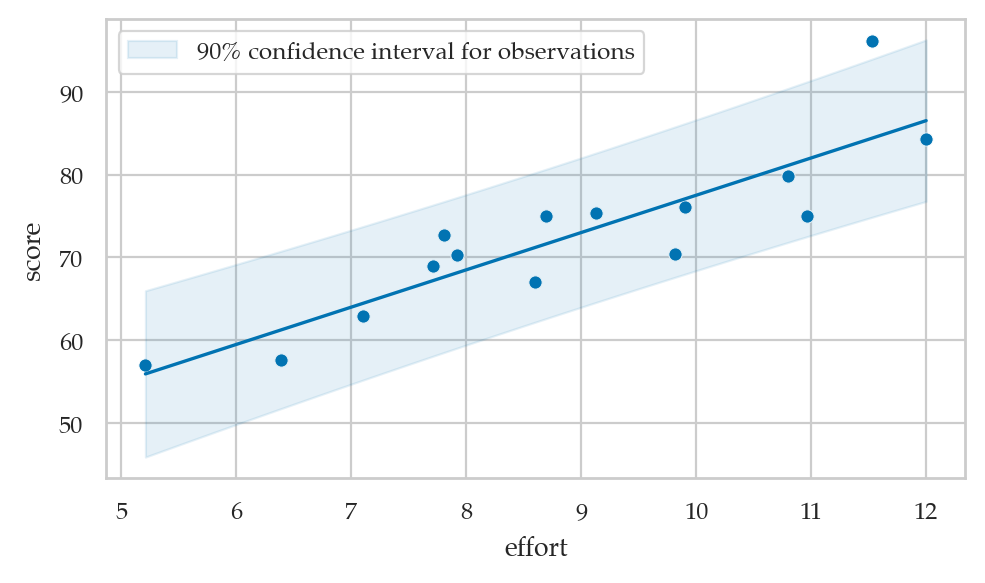

In [37]:
# FIGURES ONLY
plot_reg(lm1)
plot_pred_bands(lm1, ci_obs=True)

filename = os.path.join(DESTDIR, "prediction_values_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

### Prediction caveats

In [38]:
efforts.min(), efforts.max()

(5.21, 12.0)

It's not OK to extrapolate the validity of the model outside of the range of values where we have observed data.

For example, there is no reason to believe in the model's predictions about an `effort` of `20` hours per week:

In [39]:
predict(20, b0=32.5, b1=4.5)

122.5

Indeed, the model predicts the grade will be above 100\% which is impossible.

## Explanations

### Strategies for fitting linear models

- **Calculus**
  We can obtain the analytical formulas ...
- **Numerical optimization**
- **Linear algebra**

### Software for fitting linear models

- `scipy`
- `statsmodels`
- `scikit-learn`

### Fitting linear models with `statsmodels`

In [40]:
import statsmodels.formula.api as smf

lm1 = smf.ols("score ~ 1 + effort", data=students).fit()

In [41]:
type(lm1)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Estimated parameters for the model

In [42]:
lm1.params

Intercept    32.465809
effort        4.504850
dtype: float64

In [43]:
type(lm1.params)

pandas.core.series.Series

We often want to extract the intercept and slope parameters
for use in subsequent calculations.

In [44]:
b0 = lm1.params["Intercept"]  # = lm1.params[0]
b1 = lm1.params["effort"]     # = lm1.params[1]
b0, b1

(32.465809301599606, 4.504850344209074)

The estimate $\widehat{\sigma}$ is obtained by taking the square root of the `.scale` attribute.

In [45]:
sigmahat = np.sqrt(lm1.scale)
sigmahat

4.929598282660258

#### Model fitted values

In [46]:
lm1.fittedvalues  # == scorehats

0     81.838969
1     71.612959
2     71.207522
3     68.144224
4     77.063828
5     81.118193
6     67.648690
7     73.595093
8     55.936080
9     67.198205
10    76.703440
11    84.406734
12    64.450247
13    61.251803
14    86.524013
dtype: float64

#### Residuals

In [47]:
lm1.resid  # == scores - scorehats

0     -6.838969
1      3.387041
2     -4.207522
3      2.155776
4     -0.963828
5     -1.318193
6      5.051310
7      1.804907
8      1.063920
9      1.801795
10    -6.303440
11    11.793266
12    -1.550247
13    -3.651803
14    -2.224013
dtype: float64

#### Sum-of-squared quantities

In [48]:
# SSR     # ESS     # TSS              # R2
lm1.ssr,  lm1.ess,  lm1.centered_tss,  lm1.rsquared

(315.91220996929053,
 1078.2917900307098,
 1394.2040000000002,
 0.7734103402591798)

#### Predictions

Predict the `score` of a new student who invests 9 hours of `effort` per week.

In [49]:
lm1.predict({"effort":9})

0    73.009462
dtype: float64

In [50]:
pred = lm1.get_prediction({"effort":9})
pred.se_mean, pred.conf_int(alpha=0.1)

(array([1.27444859]), array([[70.75249883, 75.26642597]]))

In [51]:
pred.se_obs, pred.conf_int(obs=True, alpha=0.1)

(array([5.09167541]), array([[63.99244438, 82.02648042]]))

#### Model summary table

In [52]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     44.37
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.56e-05
Time:                        08:23:43   Log-Likelihood:                -44.140
No. Observations:                  15   AIC:                             92.28
Df Residuals:                      13   BIC:                             93.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4658      6.155      5.275      0.000      19.169      45.763
effort         4.5049      0.676      6.661      0.000       3.044       5.966
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                1.777
Skew:                           0.772   Prob(JB):                        0.411
Kurtosis:                       3.677   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Seaborn functions for plotting linear models

Saved figure to figures/lm/simple/regplot_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/regplot_students_score_vs_effort.png


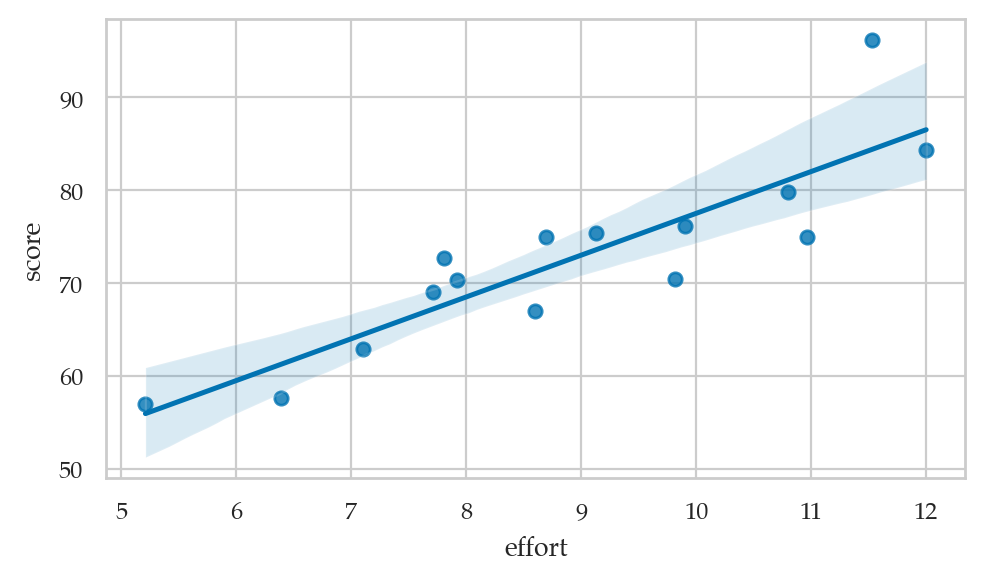

In [53]:
sns.regplot(x="effort", y="score", data=students);

filename = os.path.join(DESTDIR, "regplot_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

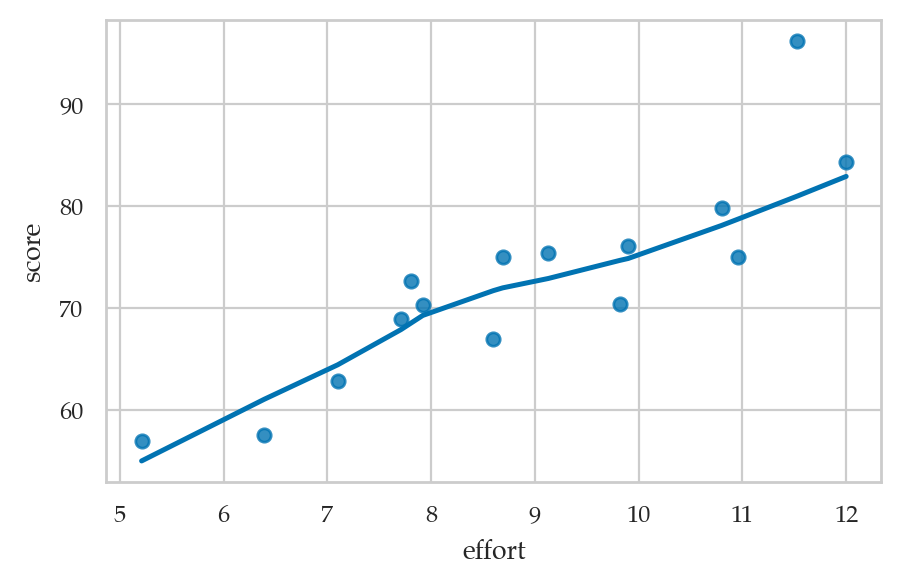

In [54]:
sns.regplot(x="effort", y="score", data=students, lowess=True);

In [55]:
# MANUAL LOWESS PLOT
# from statsmodels.nonparametric.smoothers_lowess import lowess
# scores = students["score"]
# efforts = students["effort"]
# xgrid, ylowess = lowess(scores, efforts, frac=0.5).T
# sns.scatterplot(x=efforts, y=scores)
# sns.lineplot(x=xgrid, y=ylowess)

Saved figure to figures/lm/simple/residplot_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/residplot_students_score_vs_effort.png


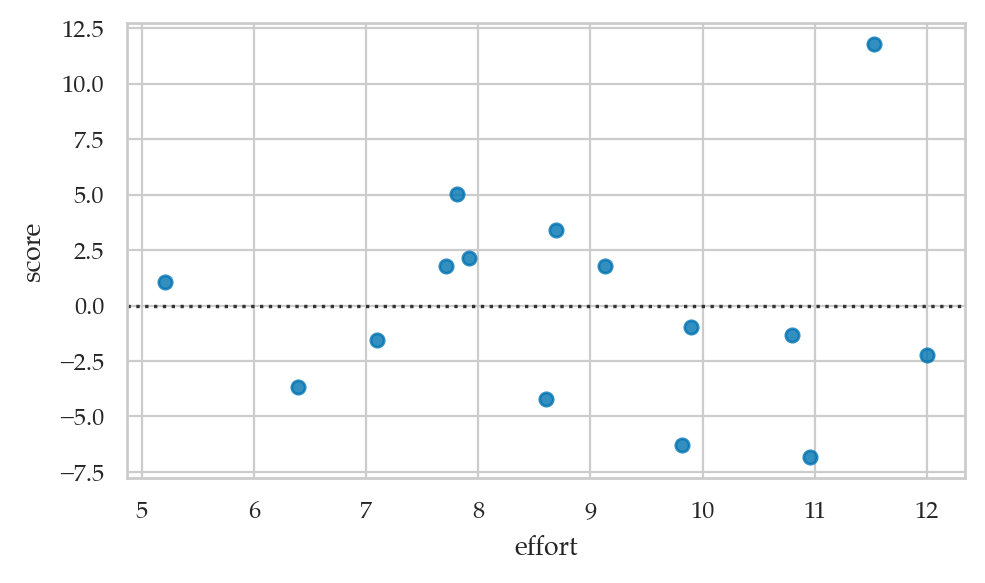

In [56]:
sns.residplot(x="effort", y="score", data=students);

filename = os.path.join(DESTDIR, "residplot_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

## Alternative methods for fitting linear models (optional)

### Numerical optimization

In [57]:
from scipy.optimize import minimize

def ssr(betas, xdata, ydata):
    yhat = betas[0] + betas[1]*xdata
    resid = ydata - yhat
    return np.sum(resid**2)

optres = minimize(ssr, x0=[0,0], args=(efforts,scores))
beta0, beta1 = optres.x
beta0, beta1

(32.465809793102544, 4.504850301246796)

### Linear algebra

linear algebra solution using `numpy`


In [58]:
import numpy as np

# Prepare the design matrix 
X = np.ndarray((n,2))
X[:,0] = 1
X[:,1] = efforts
X

array([[ 1.  , 10.96],
       [ 1.  ,  8.69],
       [ 1.  ,  8.6 ],
       [ 1.  ,  7.92],
       [ 1.  ,  9.9 ],
       [ 1.  , 10.8 ],
       [ 1.  ,  7.81],
       [ 1.  ,  9.13],
       [ 1.  ,  5.21],
       [ 1.  ,  7.71],
       [ 1.  ,  9.82],
       [ 1.  , 11.53],
       [ 1.  ,  7.1 ],
       [ 1.  ,  6.39],
       [ 1.  , 12.  ]])

We obtain the least squares solution using the Moore–Penrose inverse formula:

$$
    \vec{\beta} = (X^{\sf T} X)^{-1}X^{\sf T}\; \mathbf{y}
$$

In [59]:
lares = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(scores)
beta0, beta1 = lares
beta0, beta1

(32.46580930159923, 4.504850344209087)

### Fitting linear models using `scipy`

The helper function `scipy.stats.linregress` ...

In [60]:
from scipy.stats import linregress

scipyres = linregress(efforts, scores)
scipyres.intercept, scipyres.slope

(32.46580930159963, 4.504850344209071)

### Fitting linear models using `scikit-learn`

The class `sklearn.linear_model.LinearRegression` ...

In [61]:
from sklearn.linear_model import LinearRegression

sklmodel = LinearRegression()
sklmodel.fit(efforts.values[:,np.newaxis], scores)
sklmodel.intercept_, sklmodel.coef_

(32.46580930159961, array([4.50485034]))

### Using the low-level `statsmodels` API



In [62]:
import statsmodels.api as sm

X = sm.add_constant(efforts)
y = scores
smres = sm.OLS(y,X).fit()
smres.params["const"], smres.params["effort"]

(32.465809301599606, 4.504850344209074)

## Discussion

#### Examples of non-linear relationships

Hare are some examples of the different possible relationships between the `effort` and `score` variables.

![nonlinear relantionships](./attachments/lm/ELV_as_function_of_stats_hours.png)

## Exercises

### Exercise E??: marketing dataset

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


<Axes: xlabel='youtube', ylabel='sales'>

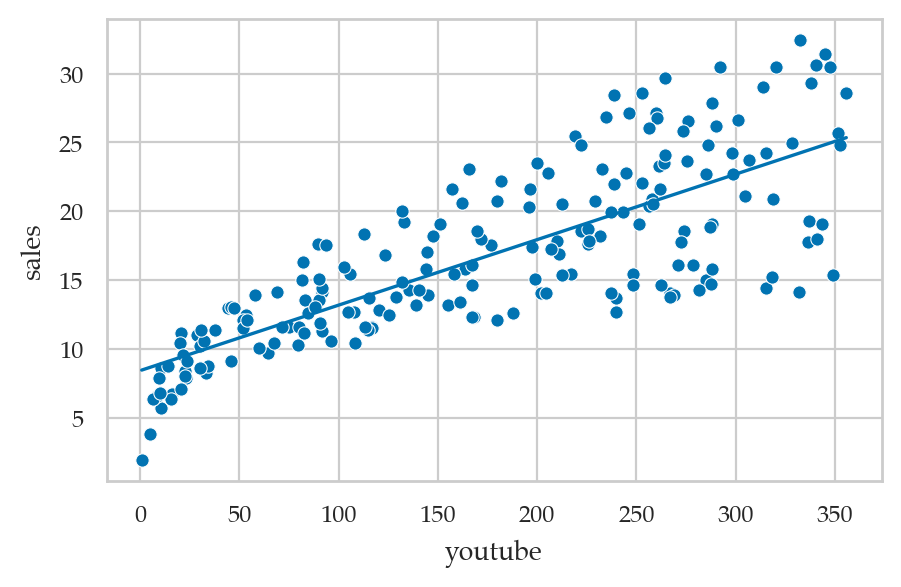

In [72]:
marketing = pd.read_csv("../datasets/exercises/marketing.csv")
print(marketing.columns)
lm_mkt = smf.ols("sales ~ 1 + youtube", data=marketing).fit()
plot_reg(lm_mkt)

<Axes: xlabel='fitted values', ylabel='residuals $r_i$'>

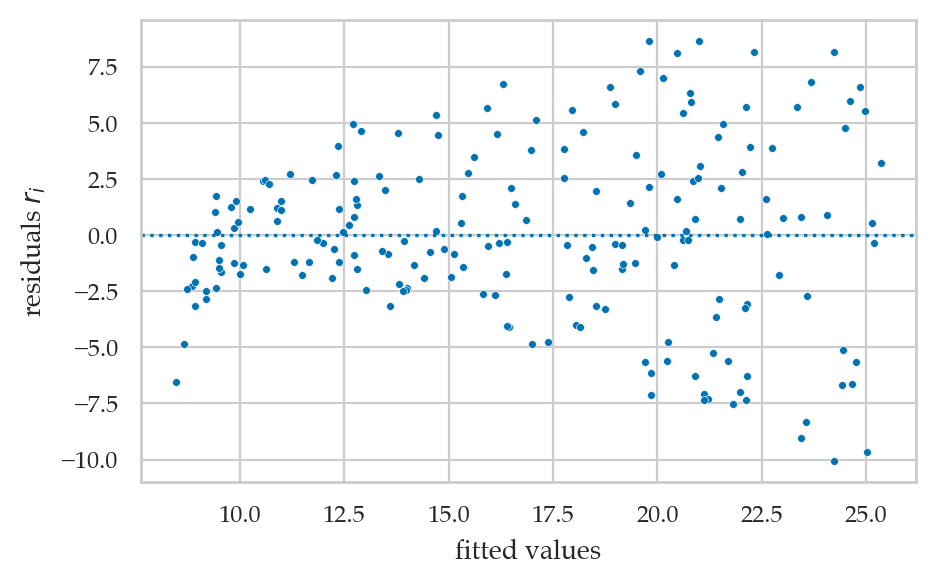

In [71]:
from ministats import plot_resid
plot_resid(lm_mkt)

## Links

### (bonus) Formula for standard error of coefficients

In [64]:
lm1.bse

Intercept    6.155051
effort       0.676276
dtype: float64

Formula using summations

$$
    se(\beta_0) = \hat{\sigma} \cdot \sqrt{ \frac{1}{n} + \frac{\overline{x}^2}{\sum (x_i - \overline{x})^2}  }
    \qquad
    se(\beta_1) = \hat{\sigma} \cdot \sqrt{\frac{1}{\sum (x_i - \overline{x})^2}}
$$

TODO: show derivation why these formulas are equiv. to matrix formulas below when p=1

In [65]:
sum_dev2 = np.sum((efforts - efforts.mean())**2)
se_Intercept = sigmahat * np.sqrt(1/n + efforts.mean()**2/sum_dev2)
se_b_effort = sigmahat/np.sqrt(sum_dev2)
se_Intercept, se_b_effort

(6.155051380977695, 0.6762756464968055)

Alternative formula using design matrix

$$
    [se(\beta_0), se(\beta_1)]
    =
    \hat{\sigma} \cdot \text{diag}\left( \sqrt{ (X^T X)^{-1} } \right)
$$

where $X$ is the design matrix.

In [66]:
# construct the design matrix for the model 
X = sm.add_constant(students[["effort"]])
# calculate the diagonal of the inverse-covariance matrix
inv_covs = np.diag(np.linalg.inv(X.T.dot(X)))
np.sqrt(sigmahat**2 * inv_covs)

array([6.15505138, 0.67627565])

In [67]:
lm1.model.exog[:,1]

array([10.96,  8.69,  8.6 ,  7.92,  9.9 , 10.8 ,  7.81,  9.13,  5.21,
        7.71,  9.82, 11.53,  7.1 ,  6.39, 12.  ])